In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense , LSTM , Dropout , Bidirectional
from keras.models import Sequential
from datetime import datetime
from numpy import sqrt
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np
import joblib
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df= pd.read_csv("C:/Users/annbl/Downloads/Bitcoin Price Predictions/coin_Monero.csv")
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Monero,XMR,2014-05-22 23:59:59,2.18888,1.35909,1.58940,2.09558,132918.0,1.855608e+06
1,2,Monero,XMR,2014-05-23 23:59:59,3.43437,2.05104,2.05104,2.96302,266852.0,2.692180e+06
2,3,Monero,XMR,2014-05-24 23:59:59,4.01424,2.61778,2.92039,3.70245,248028.0,3.456658e+06
3,4,Monero,XMR,2014-05-25 23:59:59,4.04303,2.80330,4.04303,3.13856,283545.0,2.993339e+06
4,5,Monero,XMR,2014-05-26 23:59:59,3.76235,2.31202,3.21897,3.02186,220148.0,2.946133e+06


In [4]:
df.shape

(2602, 10)

In [5]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2.602000e+03,2.602000e+03
mean,1301.500000,77.357637,70.481496,74.069198,74.134773,1.637467e+08,1.236534e+09
std,751.277024,96.070702,85.520895,91.188680,91.180556,9.193947e+08,1.534699e+09
min,1.000000,0.251757,0.212967,0.220121,0.223522,7.899570e+03,1.279606e+06
25%,651.250000,1.706342,1.472560,1.575765,1.588685,1.735218e+05,9.731418e+06
50%,1301.500000,52.737242,49.691152,51.254060,51.337759,2.466770e+07,8.558357e+08
75%,1951.750000,105.886750,99.589450,103.467749,102.915250,1.034612e+08,1.708818e+09
max,2602.000000,517.620245,453.390991,483.709977,483.583612,2.895912e+10,8.658968e+09


In [6]:
df.isnull().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602 entries, 0 to 2601
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2602 non-null   int64  
 1   Name       2602 non-null   object 
 2   Symbol     2602 non-null   object 
 3   Date       2602 non-null   object 
 4   High       2602 non-null   float64
 5   Low        2602 non-null   float64
 6   Open       2602 non-null   float64
 7   Close      2602 non-null   float64
 8   Volume     2602 non-null   float64
 9   Marketcap  2602 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 203.4+ KB


In [8]:
tam1 = df.shape[0]
df.shape

(2602, 10)

In [9]:
values = df['Close'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
np.mean(values)

74.13477

In [10]:
train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

1821 781


In [11]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [12]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

1820
780


In [13]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [14]:
model = Sequential()
model.add(Bidirectional(LSTM(32)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.1))  # Changed dropout rate to 0.9
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.1))  # Changed dropout rate to 0.9
model.add(Dense(units=1))
model.build(input_shape=(trainX.shape[0], trainX.shape[1], trainX.shape[2]))

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (1820, 64)             │         8,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (1820, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (1820, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (1820, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (1820, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (1820, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,345 (99.00 KB)

 Trainable params: 25,345 (99.00 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
def train_model(model, loss, optimizer, trainX, trainY):

  model.compile(loss=loss, optimizer=optimizer)
  #train model
  history = model.fit(trainX, trainY, epochs=30, batch_size= 200,  validation_data = (testX, testY))
  # plot cost
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.legend()
  plt.show()

In [16]:
def evaluate_model(model, testX, testY):

  yhat = model.predict(testX)
  plt.title('Curve of actual value and predicted value on the scale used in training')
  plt.plot(yhat, label='predict')
  plt.plot(testY, label='true')
  plt.legend()
  plt.show()

  yhat_inverse = scaler.inverse_transform(yhat.reshape(-1, 1))
  testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

  mse = mean_squared_error(testY_inverse, yhat_inverse)
  r2 = r2_score(testY_inverse, yhat_inverse)
  mae = mean_absolute_error(testY_inverse, yhat_inverse)
  evs = explained_variance_score(testY_inverse, yhat_inverse)
  rmse= sqrt(mse)

  print("Model: LSTM")
  print("Mean Squared Error:", mse)
  print("R-squared:", r2)
  print("Mean Absolute Error:", mae)
  print("Explained Variance Score:", evs)
  print("RMSE:", rmse)

  plt.title('Actual value curve and predicted value in US dollars')
  plt.plot(yhat_inverse, label='predict')
  plt.plot(testY_inverse, label='actual', alpha=0.5)
  plt.legend()
  plt.show()

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0340 - val_loss: 0.0226
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - val_loss: 0.0095
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 - val_loss: 9.6597e-04
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - val_loss: 8.2821e-04
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.3816e-04 - val_loss: 6.5482e-04
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.0717e-04 - val_loss: 5.5224e-04
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.5680e-04 - val_loss: 5.2976e-04
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.6096e-04 - val_loss: 5.2450e-04
Epoch 10/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.2493e-04 - val_loss: 5.1935e-04
Epoch 11/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.8037e-04 - val_loss: 5.1023e-04
Epoch 12/30
10/10

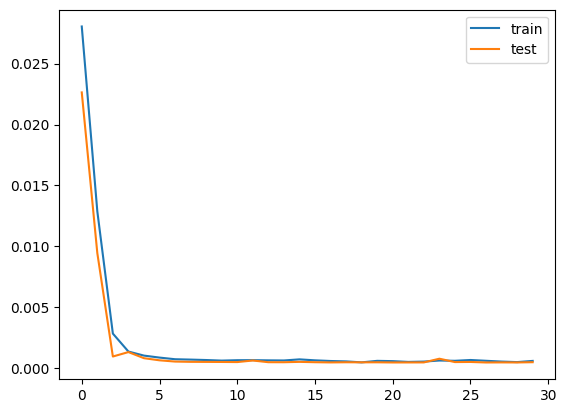

In [17]:
train_model(model, 'mse', 'adam', trainX, trainY)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


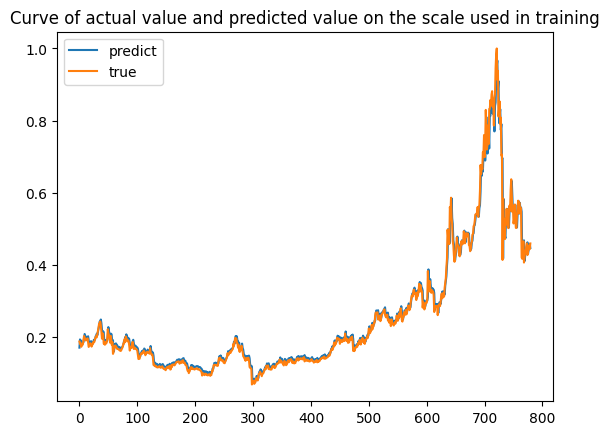

Model: LSTM
Mean Squared Error: 116.64867
R-squared: 0.9843001133483776
Mean Absolute Error: 5.922114
Explained Variance Score: 0.9847398400306702
RMSE: 10.800402


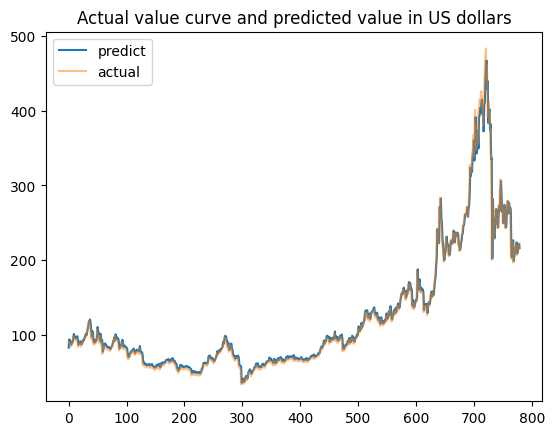

In [18]:
evaluate_model(model, testX, testY)

In [19]:
model.save('model_XMR.h5')

joblib.dump(scaler, 'scaler_xmr.pkl')

['scaler_xmr.pkl']

In [20]:
def create_time_steps(length):
  time_steps = []
  for i in range(-length, 0, 1):
    time_steps.append(i)
  return time_steps

def baseline(history):
  return np.mean(history)

def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

In [21]:
def predict_next_day(model, testX, testY):

  yhat_inverse = scaler.inverse_transform(model.predict(testX).reshape(-1, 1))
  testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

  show_plot([testY_inverse[0:200], yhat_inverse[201],baseline(testY_inverse[201])], 1, 'Next day prediction')

  print('predicted value of day 201: ', yhat_inverse[201])
  print('Actual value of day 201: ', testY_inverse[201])

In [22]:
predict_next_day(model, testX, testY)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
predicted value of day 201:  [57.083584]
Actual value of day 201:  [54.24589]


In [ ]:
def predict_price(model, scaler, user_input):
    try:
        # Reshape and scale the input
        user_input_reshaped = user_input.reshape(-1, 1)
        user_input_scaled = scaler.transform(user_input_reshaped).reshape(1, -1, 1)

        # Predict
        prediction = model.predict(user_input_scaled)
        prediction_reshaped = np.repeat(prediction, user_input_scaled.shape[1]).reshape(1, -1)

        # Inverse transform
        prediction_inverse = scaler.inverse_transform(
            np.concatenate((user_input_scaled.reshape(1, -1), prediction_reshaped), axis=0)
        )[1]

        return prediction_inverse[1]
    except Exception as e:
        print("Error during prediction:", e)
        return None
print("Monero Price Prediction System")
print("---------------------------")

high = float(input("Enter the highest price: "))
low = float(input("Enter the lowest price: "))
open = float(input("Enter the open price: "))
close = float(input("Enter the close price: "))
volume = float(input("Enter the volume: "))
user_input = np.array([[high,low,open,close,volume]])
predicted_value = predict_price(model, scaler, user_input)
print('Predicted Weighted Price:', predicted_value)

Monero Price Prediction System
---------------------------
Enter the highest price: 2.18888
Enter the lowest price: 1.35909
Enter the open price: 1.58940
Enter the close price: 3.13856
Enter the volume: 220148.0
1/1 [==============================] - 0s 36ms/step
Predicted Weighted Price: 1885.1244729280827
